In [2]:
# Imports
# import tensorflow as tf
import torch
import haiku as hk
import numpy as np
import jax
import tensorflow as tf

2024-07-16 17:47:39.308737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 17:47:39.308788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 17:47:39.310041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 17:47:40.149363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
seed = 43
key = jax.random.PRNGKey(seed)
key, subkey = jax.random.split(key)
rng = hk.PRNGSequence(key)
print(jax.devices())

coeffs_a = jax.random.uniform(next(rng), (5,), minval = 0.5, maxval = 1.5)
display(coeffs_a)
coeffs_b = jax.random.uniform(subkey, (5,), minval = 0.5, maxval = 1.5)
display(coeffs_b)

[cuda(id=0)]


Array([0.90049255, 1.2287436 , 1.2970688 , 1.3938311 , 0.6825237 ],      dtype=float32)

Array([0.84193146, 0.5630537 , 1.1447655 , 1.1455721 , 0.9150493 ],      dtype=float32)

In [4]:
feature_description = {
    'equation': tf.io.FixedLenFeature([], tf.string),
    'caption': tf.io.VarLenFeature(tf.string),
    'cond_k': tf.io.FixedLenFeature([], tf.string),
    'cond_v': tf.io.FixedLenFeature([], tf.string),
    'qoi_k': tf.io.FixedLenFeature([], tf.string),
    'qoi_v': tf.io.FixedLenFeature([], tf.string),
}
display(feature_description)

{'equation': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'caption': VarLenFeature(dtype=tf.string),
 'cond_k': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'cond_v': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'qoi_k': FixedLenFeature(shape=[], dtype=tf.string, default_value=None),
 'qoi_v': FixedLenFeature(shape=[], dtype=tf.string, default_value=None)}

In [92]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('analysis/result_dict.pkl', 'rb') as f:
    result_dict = pickle.load(f)

error_dict = {key: value for key, value in result_dict.items() if len(key) > 1 and key[1] == 'error'}
for key, value in result_dict.items():
    print(key, value.shape, end = ", ", flush=True)
    try:
      print(np.mean(value), np.std(value), flush=True)
    except:
      print("", flush=True)

('mfc_gparam_hj_forward11', 'ground_truth') (500, 50, 1), 0.91095513 0.7212198
('mfc_gparam_hj_forward11', 'mask') (500, 50), 0.91092 0.2848591820531681
('mfc_gparam_hj_forward12', 'ground_truth') (500, 50, 1), 

0.9090445 0.55140704
('mfc_gparam_hj_forward12', 'mask') (500, 50), 0.90792 0.289138848306484
('mfc_gparam_hj_forward22', 'ground_truth') (500, 50, 1), 0.9115039 0.5549617
('mfc_gparam_hj_forward22', 'mask') (500, 50), 0.9102 0.2858950156963217
('mfc_rhoparam_hj_forward11', 'ground_truth') (500, 50, 1), 0.91078097 0.76422983
('mfc_rhoparam_hj_forward11', 'mask') (500, 50), 0.91028 0.2857801980543789
('mfc_rhoparam_hj_forward12', 'ground_truth') (500, 50, 1), 0.9157959 0.57609415
('mfc_rhoparam_hj_forward12', 'mask') (500, 50), 0.91052 0.28543533348203404
('ode_auto_const_forward', 'ground_truth') (500, 50, 1), 0.034241017 0.7849904
('ode_auto_const_forward', 'mask') (500, 50), 0.91024 0.28583761543925595
('ode_auto_const_inverse', 'ground_truth') (500, 50, 1), -0.012597151 0.9476131
('ode_auto_const_inverse', 'mask') (500, 50), 0.88912 0.3139834798201969
('ode_auto_linear1_forward', 'ground_truth') (500, 50, 1), -0.0018546398 0.80675536
('ode_auto_linear1_forward', 'mask') (500, 50), 0

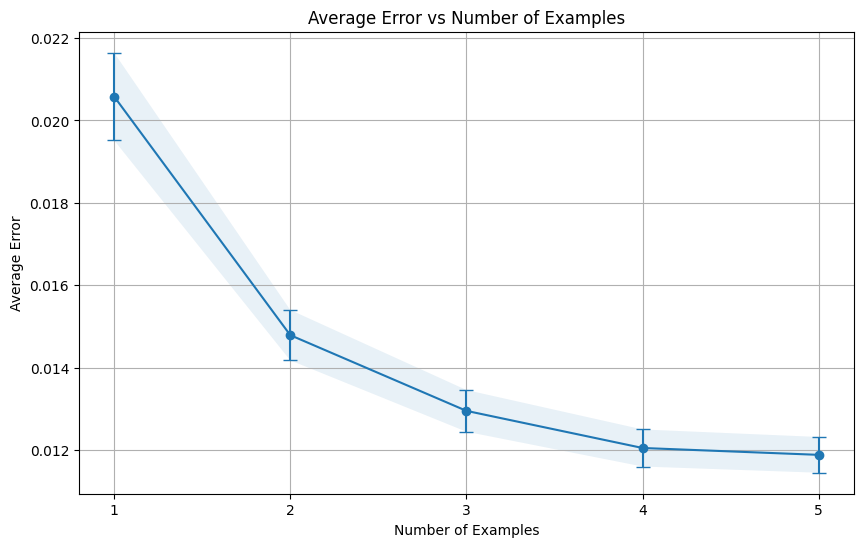

Number 1:
  Average of averages: 0.0206
  Average of standard deviations: 0.0011
Number 2:
  Average of averages: 0.0148
  Average of standard deviations: 0.0006
Number 3:
  Average of averages: 0.0130
  Average of standard deviations: 0.0005
Number 4:
  Average of averages: 0.0121
  Average of standard deviations: 0.0004
Number 5:
  Average of averages: 0.0119
  Average of standard deviations: 0.0004


In [98]:
# Initialize dictionaries to store sums and counts
avg_sums = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
std_sums = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

for key, value in error_dict.items():
    number = key[-2]  
    if number in [1, 2, 3, 4, 5]:
        avg_sums[number] += np.mean(value)
        std_sums[number] += np.std(value)/19
        counts[number] += 1

avg_of_avgs = {k: v / 19 for k, v in avg_sums.items()}
avg_of_stds = {k: v / 19 for k, v in std_sums.items()}

numbers = list(avg_of_avgs.keys())
avg_values = list(avg_of_avgs.values())
std_values = list(avg_of_stds.values())
# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(numbers, avg_values, yerr=std_values, fmt='o-', capsize=5)
# Fill in the area between the error bars
plt.fill_between(numbers, np.subtract(avg_values, std_values), np.add(avg_values, std_values), alpha=0.1)
plt.xlabel('Number of Examples')
plt.ylabel('Average Error')
plt.title('Average Error vs Number of Examples')
plt.xticks(numbers)
plt.grid(True)
plt.show()

# Print the results
for number in numbers:
    print(f"Number {number}:")
    print(f"  Average of averages: {avg_of_avgs[number]:.4f}")
    print(f"  Average of standard deviations: {avg_of_stds[number]:.4f}")